## <font color=Red>Importing the data<font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('telemonitoring_parkinsons_updrs.csv')

## <font color=Blue>Getting a basic idea of the dataset<font>

In [3]:
df.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

## <font color=orange>Removing redundant variable<font>

In [5]:
df.drop('motor_UPDRS',axis=1,inplace=True)

### We can drop the motor_UPDRS variable as it is redundant.We already have total_UPDRS for our target

## <font color=violet> Outliers<font>

## total_UPDRS vs subject

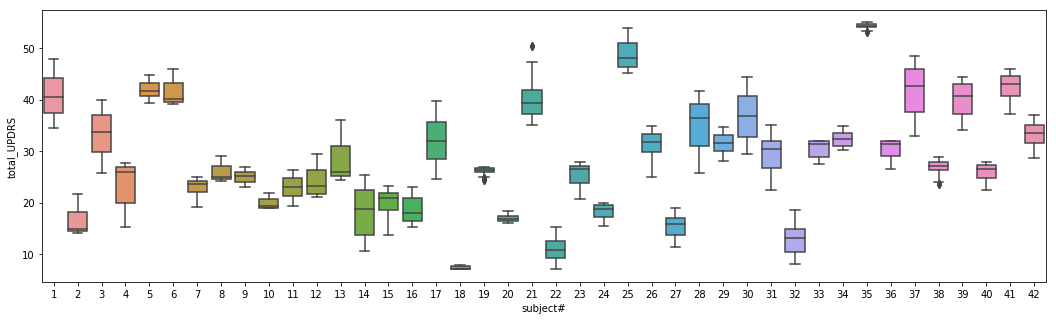

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
sns.boxplot(df['subject#'],df['total_UPDRS'])

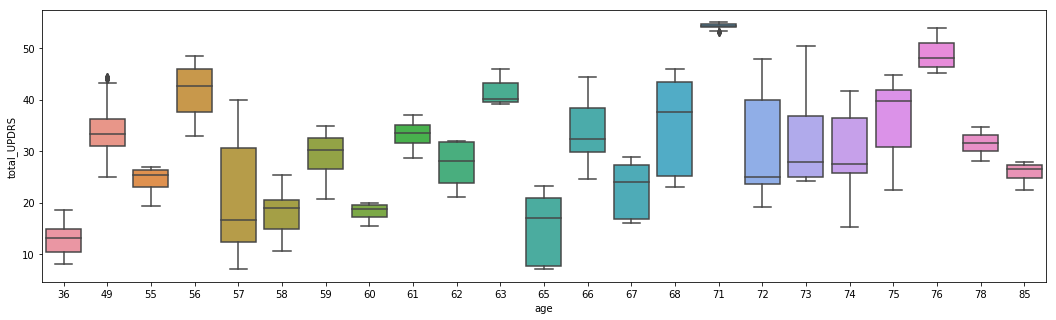

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
sns.boxplot(df['age'],df['total_UPDRS'])

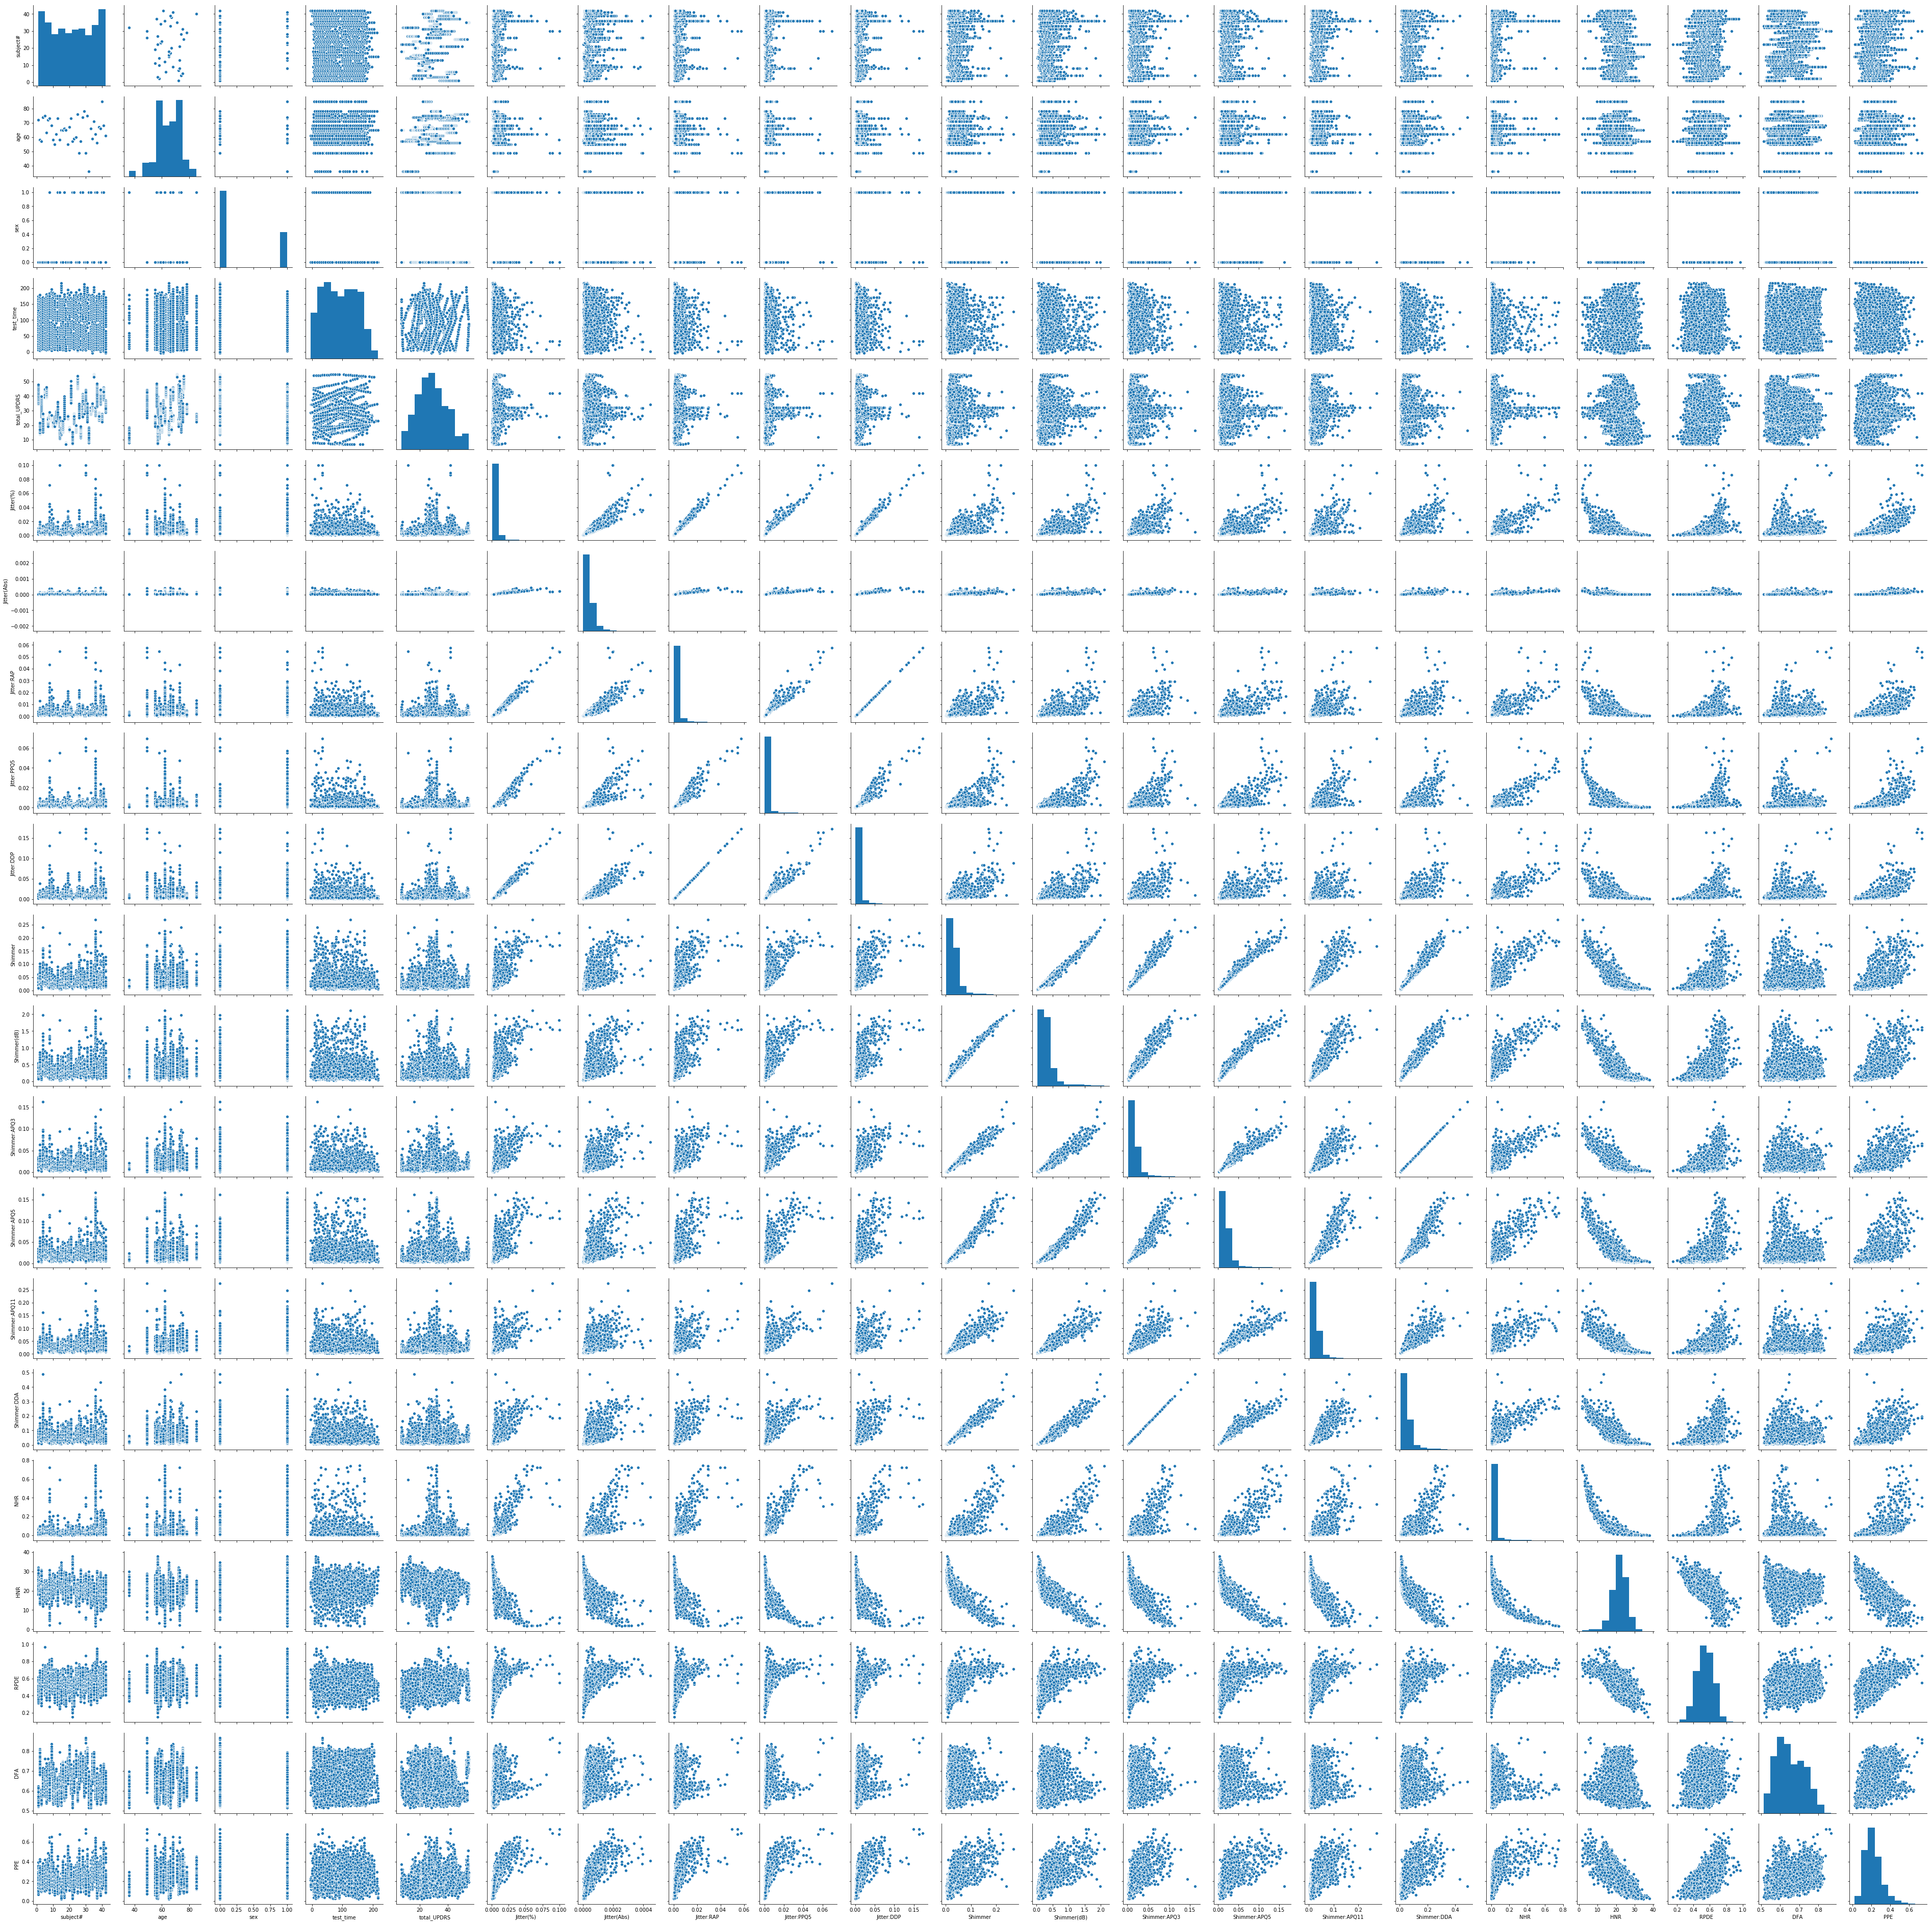

In [8]:
sns.pairplot(df)

## <font color=lightgreen> Statistical description<font>

In [9]:
df.describe()

subject#          age          sex    test_time  total_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    29.018942   
std      12.372279     8.821524     0.465656    53.445602    10.700283   
min       1.000000    36.000000     0.000000    -4.262500     7.000000   
25%      10.000000    58.000000     0.000000    46.847500    21.371000   
50%      22.000000    65.000000     0.000000    91.523000    27.576000   
75%      33.000000    72.000000     1.000000   138.445000    36.399000   
max      42.000000    85.000000     1.000000   215.490000    54.992000   

         Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean      0.006154     0.000044     0.002987     0.003277     0.008962  ...   
std       0.005624     0.000036     0.003124     0.003732     0.009371  ...   
min       0.000830     0.000002     0.000330     0.000430     0.000980  ...   
25%       0.003580     0.000022     0.001580     0.001820     0.004730  ...   
50%       0.004900     0.000035     0.002250     0.002490     0.006750  ...   
75%       0.006800     0.000053     0.003290     0.003460     0.009870  ...   
max       0.099990     0.000446     0.057540     0.069560     0.172630  ...   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5875.000000   5875.000000   5875.000000    5875.000000  5875.000000   
mean      0.310960      0.017156      0.020144       0.027481     0.051467   
std       0.230254      0.013237      0.016664       0.019986     0.039711   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.175000      0.009280      0.010790       0.015665     0.027830   
50%       0.253000      0.013700      0.015940       0.022710     0.041110   
75%       0.365000      0.020575      0.023755       0.032715     0.061735   
max       2.107000      0.162670      0.167020       0.275460     0.488020   

               NHR          HNR         RPDE          DFA          PPE  
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  
mean      0.032120    21.679495     0.541473     0.653240     0.219589  
std       0.059692     4.291096     0.100986     0.070902     0.091498  
min       0.000286     1.659000     0.151020     0.514040     0.021983  
25%       0.010955    19.406000     0.469785     0.596180     0.156340  
50%       0.018448    21.920000     0.542250     0.643600     0.205500  
75%       0.031463    24.444000     0.614045     0.711335     0.264490  
max       0.748260    37.875000     0.966080     0.865600     0.731730  

[8 rows x 21 columns]

## <font color=lightgreen> Model Building<font>

In [10]:
X=df.drop('total_UPDRS',axis=1)
y=df['total_UPDRS']

In [11]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 2)
regressor = RandomForestRegressor(n_estimators = 100,min_samples_split=6, random_state = 4) 
regressor.fit(X_train,y_train) 


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=4, verbose=0, warm_start=False)

## <font color=green>Model Evaluation<font>

In [12]:
regressor.score(X_train,y_train)*100

99.94742283372992

In [13]:
y_pred_test = regressor.predict(X_test)
regressor.score(X_test,y_test)*100

99.7547895328446

## <font color=magenta> FEATURE IMPORTANCE PLOT

Feature ranking:
1. feature 0 (0.510279)
2. feature 1 (0.332403)
3. feature 3 (0.059270)
4. feature 18 (0.046686)
5. feature 2 (0.031364)
6. feature 17 (0.008488)
7. feature 16 (0.005811)
8. feature 5 (0.001050)
9. feature 13 (0.000889)
10. feature 12 (0.000462)
11. feature 4 (0.000458)
12. feature 9 (0.000443)
13. feature 11 (0.000432)
14. feature 14 (0.000418)
15. feature 19 (0.000344)
16. feature 10 (0.000340)
17. feature 7 (0.000322)
18. feature 8 (0.000194)
19. feature 15 (0.000176)
20. feature 6 (0.000169)


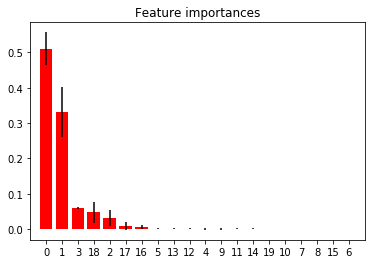

In [15]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## <font color=BLUE> INFERENCES(FEATURE IMPORTANCE)



### Subject is the most important variables.Meaning that total UPDRS is very different from subject to subject.
### Age is the second important factor.
### Test time, sexuality abd HNR are also very important in determining total UPTRS.

## <font color=green> ASSUMPTIONS FOR LR

In [16]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     99.09
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:58:54   Log-Likelihood:                -21405.
No. Observations:                5875   AIC:                         4.285e+04
Df Residuals:                    5854   BIC:                         4.299e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            35.0999      3.057     11.481      0.000      29.107      41.093
subject#          0.2636      0.011     24.464      0.000       0.242       0.285
age               0.3187      0.014     22.186      0.000       0.291       0.347
sex              -4.8120      0.313    -15.395      0.000      -5.425      -4.199
test_time         0.0159      0.002      7.010      0.000       0.011       0.020
Jitter(%)      -255.5493    203.157     -1.258      0.208    -653.812     142.713
Jitter(Abs)   -4.461e+04   9447.529     -4.722      0.000   -6.31e+04   -2.61e+04
Jitter:RAP    -2.603e+04   4.45e+04     -0.585      0.559   -1.13e+05    6.13e+04
Jitter:PPQ5    -166.9193    180.524     -0.925      0.355    -520.812     186.974
Jitter:DDP     9062.3519   1.48e+04      0.610      0.542      -2e+04    3.82e+04
Shimmer          14.1261     61.868      0.228      0.819    -107.159     135.411
Shimmer(dB)      -0.5886      4.615     -0.128      0.899      -9.636       8.459
Shimmer:APQ3    -1.5e+04   4.47e+04     -0.335      0.737   -1.03e+05    7.27e+04
Shimmer:APQ5     49.6071     52.793      0.940      0.347     -53.887     153.101
Shimmer:APQ11     9.7274     23.711      0.410      0.682     -36.755      56.210
Shimmer:DDA    4949.3436   1.49e+04      0.332      0.740   -2.43e+04    3.42e+04
NHR             -23.7172      5.944     -3.990      0.000     -35.370     -12.064
HNR              -0.4858      0.066     -7.378      0.000      -0.615      -0.357
RPDE              1.6927      1.738      0.974      0.330      -1.714       5.099
DFA             -36.3400      2.207    -16.468      0.000     -40.666     -32.014
PPE              15.4855      2.785      5.560      0.000      10.026      20.945
==============================================================================
Omnibus:                      122.980   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.121
Skew:                           0.209   Prob(JB):                     1.63e-20
Kurtosis:                       2.556   Cond. No.                     4.91e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <font color=red> No auto-correlation

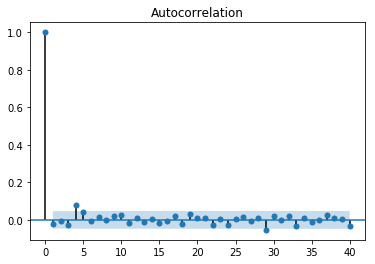

In [17]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(y_pred_test-y_test, lags=40 , alpha=0.05)
acf.show()

### A regular pattern is not formed(no such pattern like always positive,always negative). Hence, there is no auto-correlation

### <font color=red> Normality of Residuals

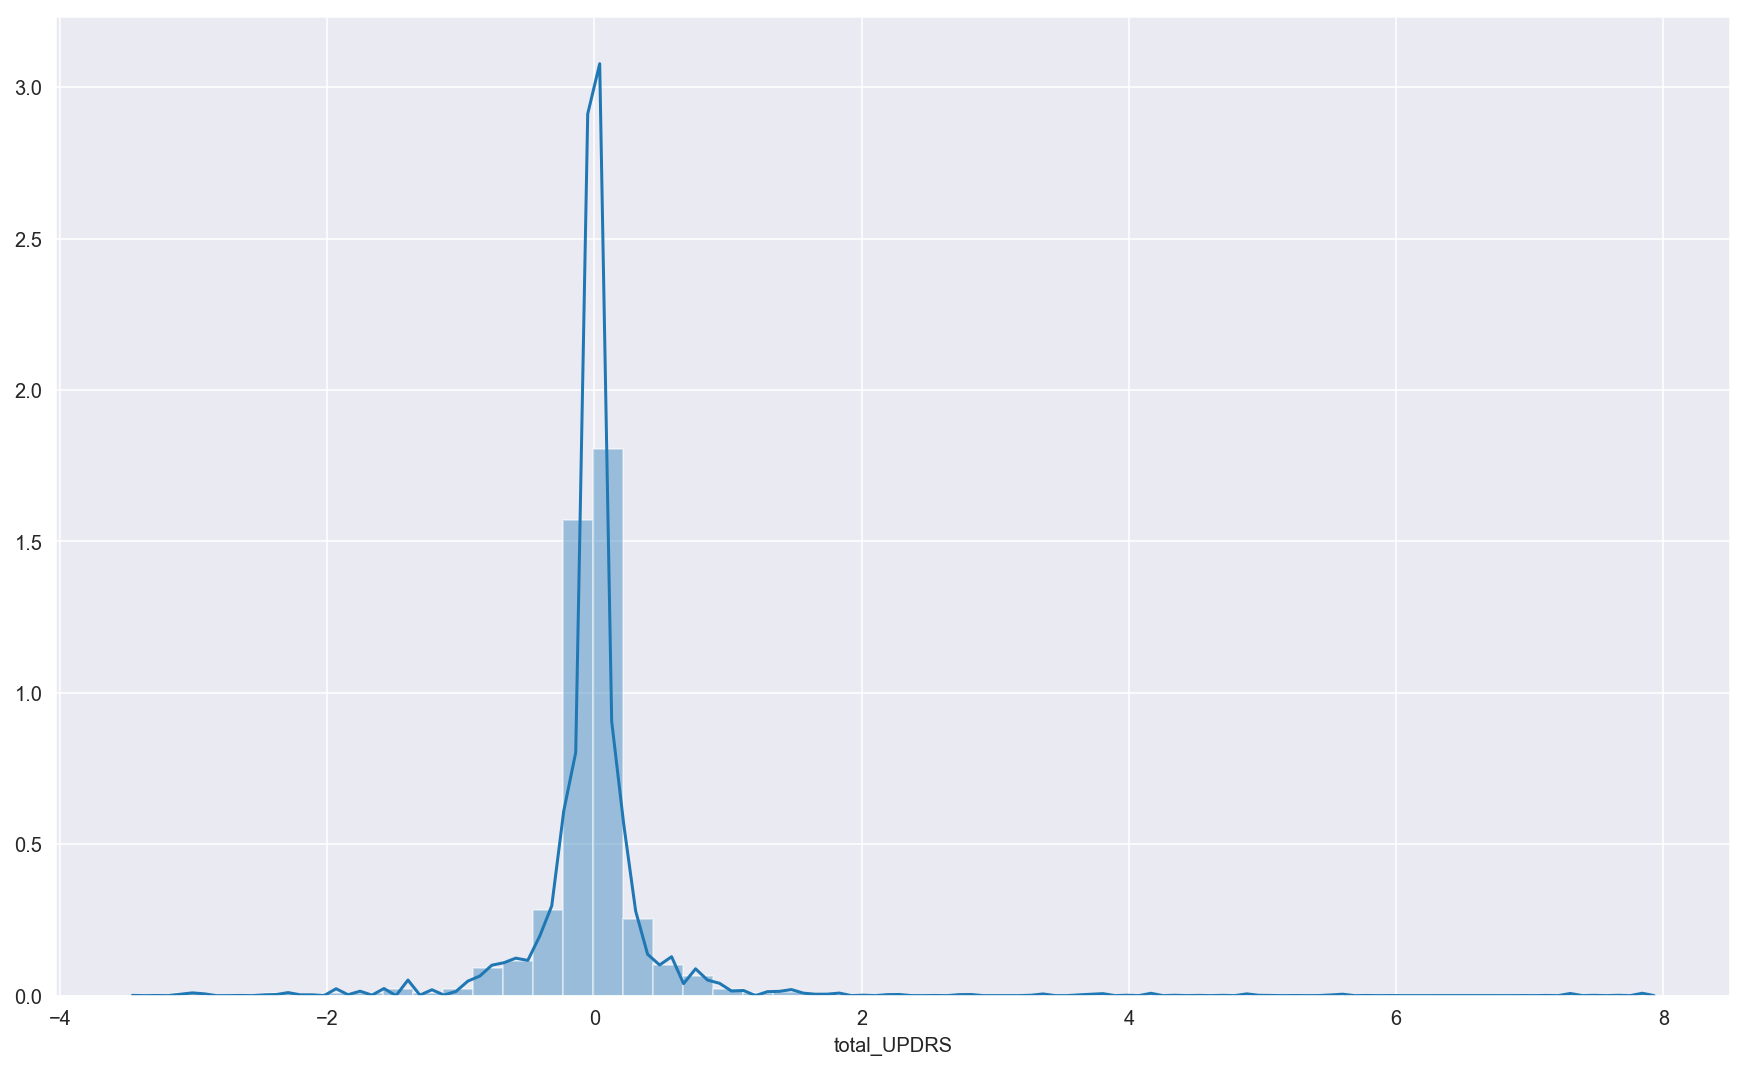

In [21]:
sns.distplot(y_pred_test-y_test)

### <font color=red> Linearity of Residuals

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

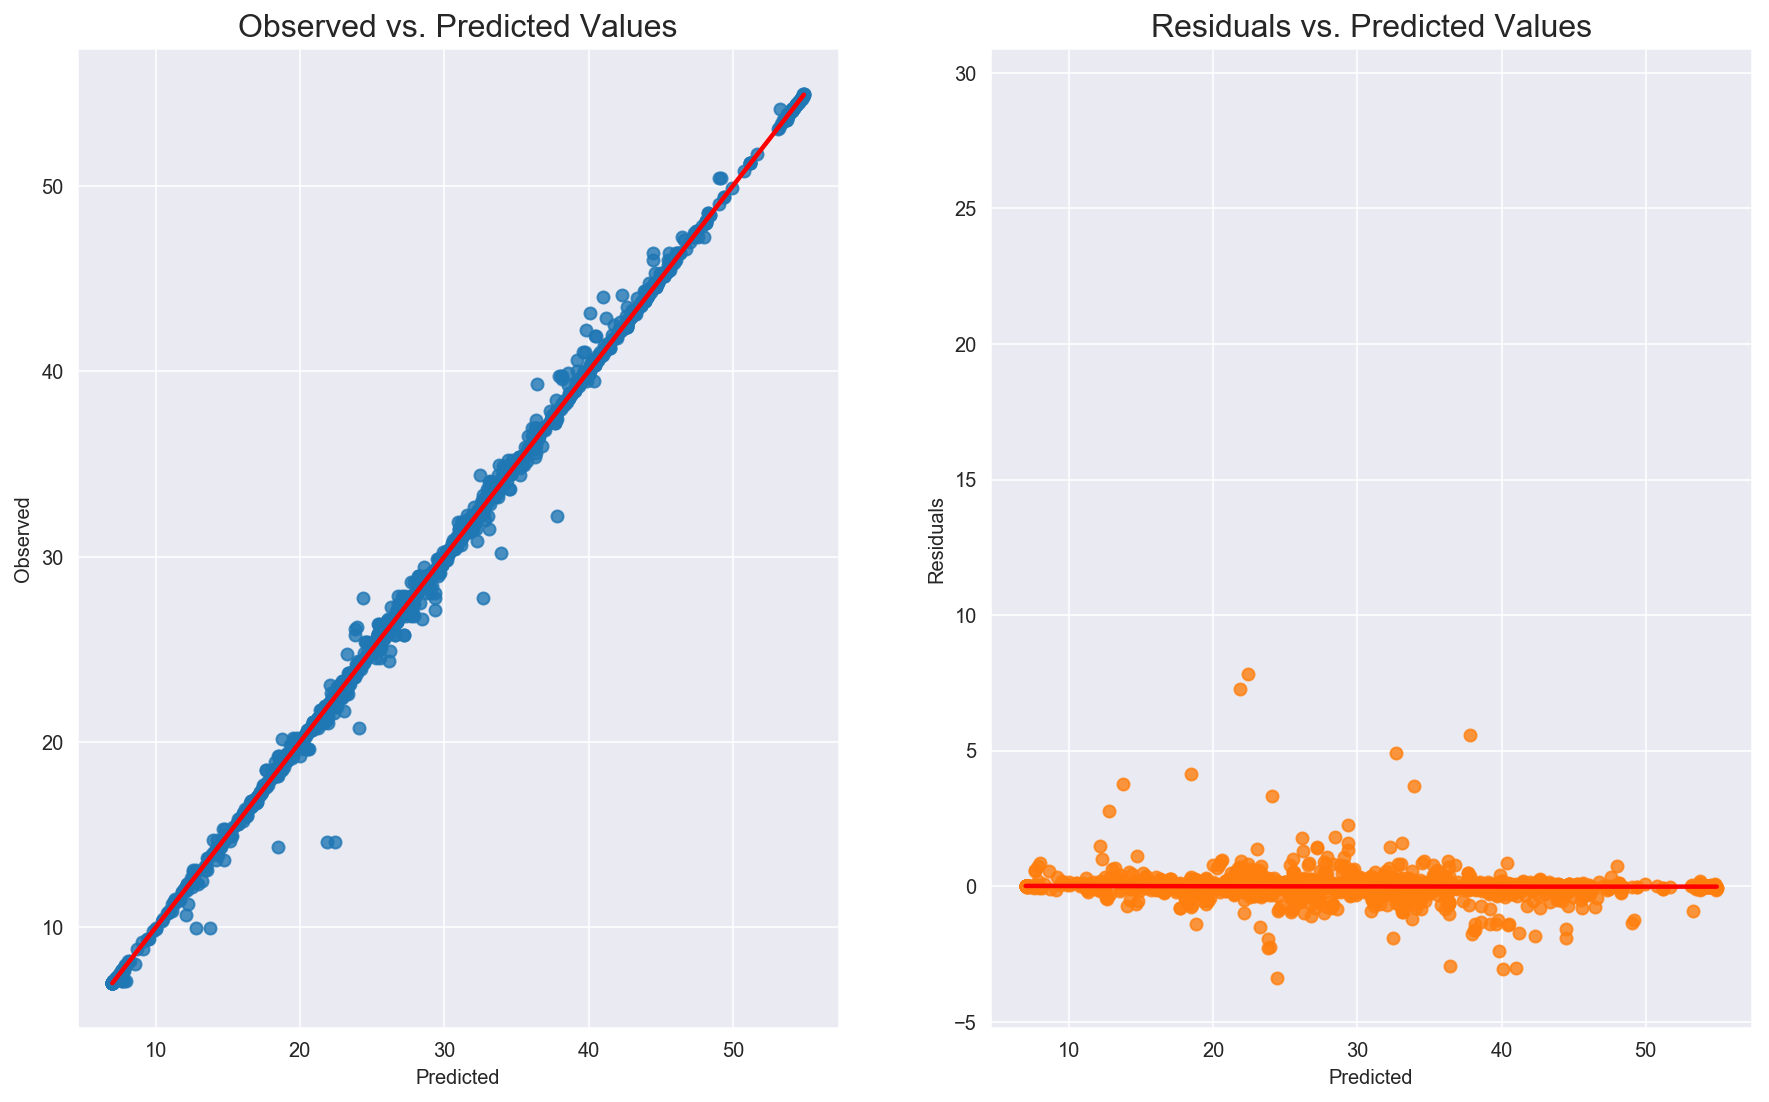

In [19]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
resids = y_pred_test-y_test
fig, ax = plt.subplots(1,2)
sns.regplot(x=y_pred_test, y=y_test, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')
sns.regplot(x=y_pred_test, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')
 

## Symmetry is observed in both graphs. Thus, linearity of residuals is satisfied

### <font color=red> Rainbow Method

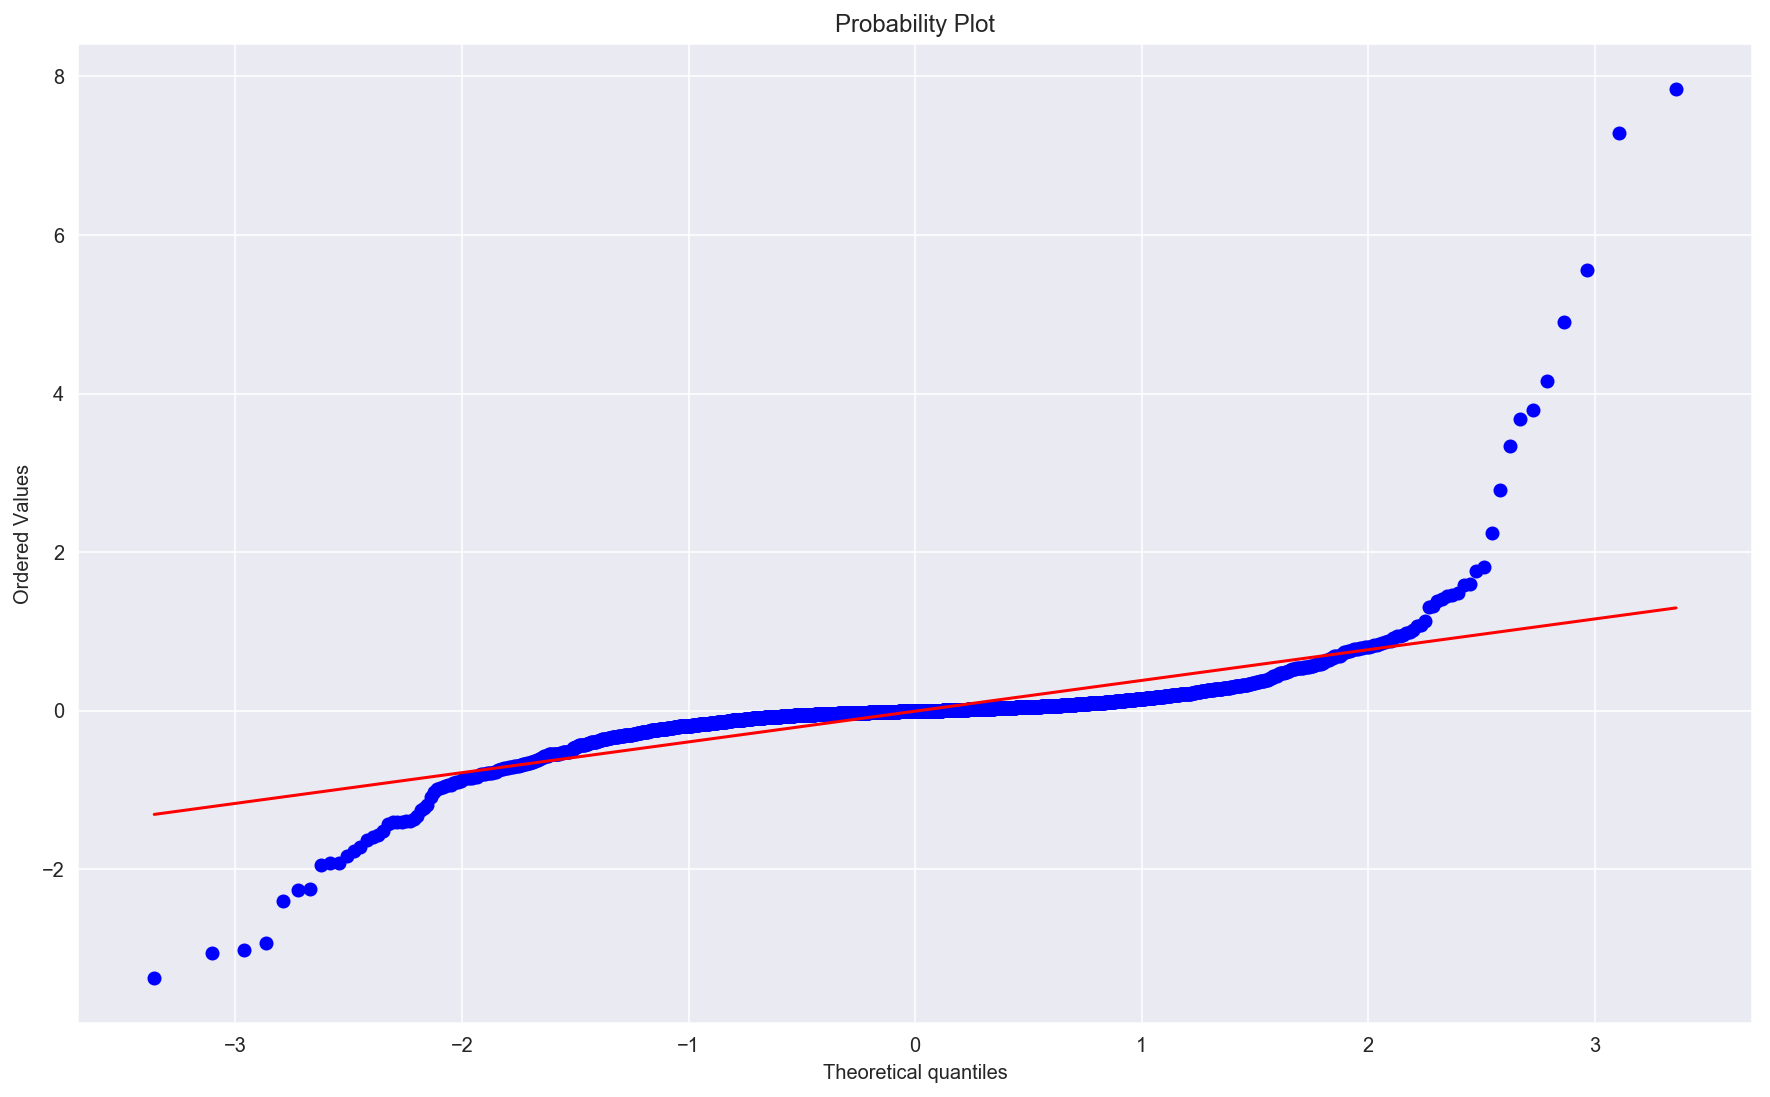

In [20]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = y_pred_test-y_test
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()